In [1]:
#model architecture definitions
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#import dependencies
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D 
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation, Flatten, Dropout

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_width = 28
img_height = 28
# flatten 28*28 images to a 784 vector for each image
#num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1).astype('float32')
    
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model() :
    model = Sequential()

# Most of these values like nb_filters, nb_rows, nb_columns are mostly trial and error.
# There is no definite answer to what is the correct one, just keep trying.
# input_shape[0] = 3 because of RGB channels
    model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height, 1), padding = 'same'))

# ReLU ensures none of the output value from CONV layer falls below 0
# To prevent vanishing gradient problem (failure to learn) from happening
    model.add(Activation('relu'))

# For every 2x2 "pixels" in the output feature map, pick the highest value,
# more like pick the most activated one.
# Most importantly, pooling effectively reduces the feature map size by 75%
    model.add(MaxPooling2D(pool_size=(2,2)))

# Repeat a few times before going into fully connected (dense) layers
# You are free to comment them out or add more conv relu pool layers
# See what it does to the accuracy
    model.add(Convolution2D(64, (3, 3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Convolution2D(128, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),))

    model.add(Convolution2D(256, (3, 3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

# We can do as many convolutions and poolings as we like, but it's time to really classify
# Again, you can do as many dense layers as you like, use different activations and dropout %
# It's all trial and error, this demo code may not be the most optimal after all!
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

# Final layer, 10 nodes representing each class, softmax activation makes sure every node sums up to 1
# That means the output nodes are in % score for each class.
    model.add(Dense(10))
    model.add(Activation('sigmoid'))

# The architecture is there. But how to measure how close we are to perfection?
# Measure the difference from prediction to ground truth - the loss
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

model = baseline_model()
#Cross validation 
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn = baseline_model, epochs=10, batch_size = 100, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X_test, y_test, cv=10)
print(results.mean())


F:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


0.9963600045442581


In [41]:
#Creating model again
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
activation_271 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_272 (Activation)  (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_182 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 7, 7, 128)         73856     
__________

(3, 3, 1)


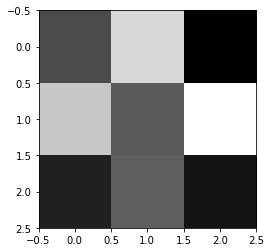

(3, 3, 32)


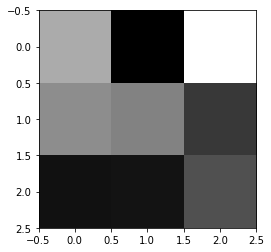

In [51]:
#Visualizing two layers of the network
from matplotlib import pyplot as plt
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from keras import activations


top_layer = model.layers[0]
#print(top_layer.get_weights()[0][:,:,0])
print(top_layer.get_weights()[0][:, :, :, 0].shape)
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()


layer_idx = utils.find_layer_idx(model, 'conv2d_182')

lower_layer = model.layers[layer_idx]
print(lower_layer.get_weights()[0][:, :, :, 0].shape)
plt.imshow(lower_layer.get_weights()[0][:, :, 0, 0].squeeze(), cmap='gray')
plt.show()